# Classifying Galaxies Using Convolutional Neural Networks


In this project, we will build a neural network to classify deep-space galaxies. we will be using image data curated by Galaxy Zoo, a crowd-sourced project devoted to annotating galaxies in support of scientific discovery.

You will identify “odd” properties of galaxies. The data falls into four classes:

[1,0,0,0] - Galaxies with no identifying characteristics.


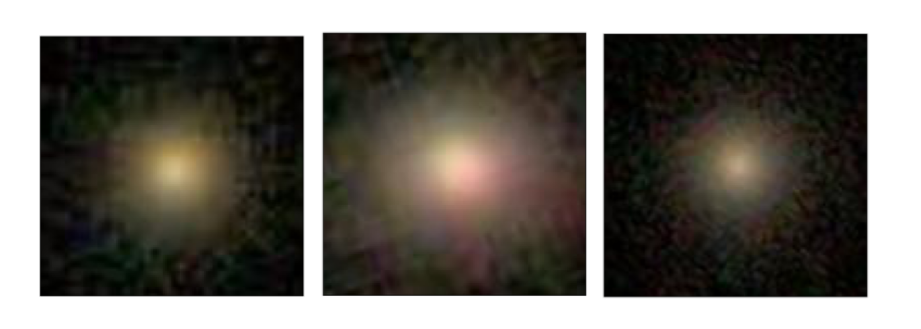

[0,1,0,0] - Galaxies with rings.

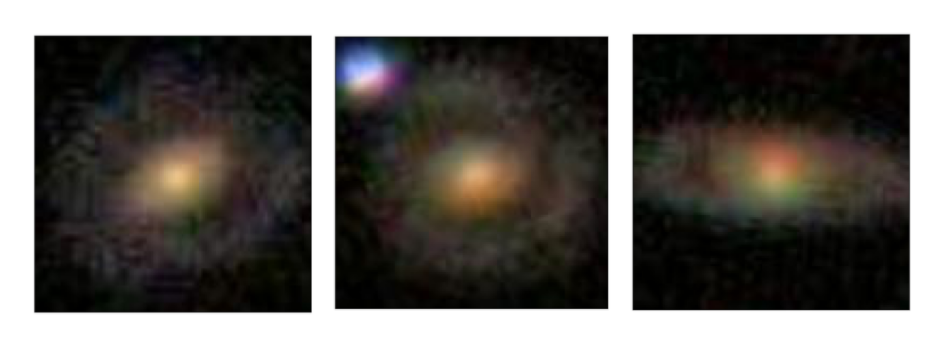


[0,0,1,0] - Galactic mergers.

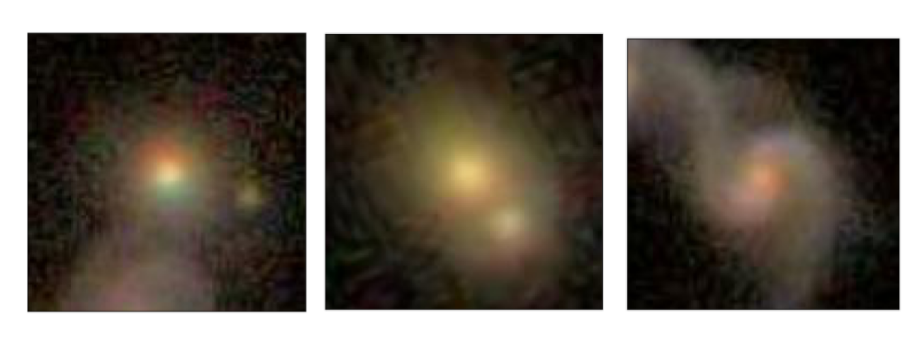

[0,0,0,1] - “Other,” Irregular celestial bodies.

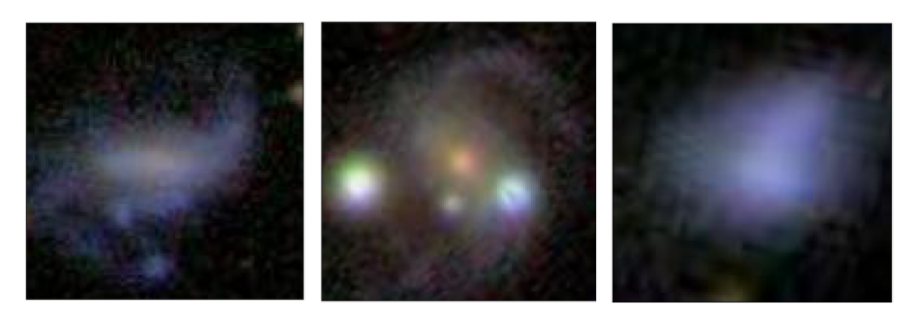

### 1. Load the data



Because the dataset comprises over one thousand images, you’ll use a custom function, <code>load_galaxy_data()</code> to load the compressed data files into the Codecademy learning environment as NumPy arrays. Take a look at the shape of the data.

Use <code>.shape</code> to print the dimensions of the <code>input_data</code> and <code>labels</code>.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from utils import load_galaxy_data

import app

# 1:
input_data, labels = load_galaxy_data()

# Print the shape of the input data and labels
print("Input data shape:", input_data.shape)
print("Labels shape:", labels.shape)


### 2. Divide the data into training and validation data 

Next, divide the data into training and validation data, using <code>sklearn</code>’s <code>train_test_split()</code> function.

- Set the <code>test_size</code> argument to be 0.20.
- Shuffle the data.
- Set the <code>random_state</code> to be 222.
- Set <code>stratify=labels</code>. This ensures that ratios of galaxies in your testing data will be the same as in the original dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from utils import load_galaxy_data

import app

# 1:
input_data, labels = load_galaxy_data()
# Print the shape of the input data and labels
print("Input data shape:", input_data.shape)
print("Labels shape:", labels.shape)



# 2: 
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    input_data, labels, 
    test_size=0.20, 
    shuffle=True, 
    random_state=222, 
    stratify=labels
)

# Print the shape of the training and validation sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape) 

### 3. Preprocess the Input


Now, it’s time to preprocess the input.

Define an <code>ImageDataGenerator</code>, and configure it so that the object will normalize the pixels using the <code>rescale</code> parameter.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from utils import load_galaxy_data

import app

# 1:
input_data, labels = load_galaxy_data()
# Print the shape of the input data and labels
print("Input data shape:", input_data.shape)
print("Labels shape:", labels.shape)



# 2: 
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    input_data, labels, 
    test_size=0.20, 
    shuffle=True, 
    random_state=222, 
    stratify=labels
)

# Print the shape of the training and validation sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

# 3: 

# Define an ImageDataGenerator for preprocessing
train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Example of how to use the generators with the training and validation data
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=16)
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=16)


### 4. Create NumpyArrayIterator

Next, create two <code>NumpyArrayIterators</code> using the  <code>.flow(x,y,batch_size=?)</code> method. We recommend using a batch size of  <code>5</code>. Significantly larger batch sizes may cause memory issues on the Codecademy platform.

- Create a training data iterator by calling  <code>.flow()</code> on your training data and labels.

- Create a validation data iterator by calling  <code>.flow()</code> on your training data and labels.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from utils import load_galaxy_data

import app

# 1:
input_data, labels = load_galaxy_data()
# Print the shape of the input data and labels
print("Input data shape:", input_data.shape)
print("Labels shape:", labels.shape)



# 2: 
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    input_data, labels, 
    test_size=0.20, 
    shuffle=True, 
    random_state=222, 
    stratify=labels
)

# Print the shape of the training and validation sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

# 3: 

# Define an ImageDataGenerator for preprocessing
train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Example of how to use the generators with the training and validation data
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=16)
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=16)

 # 4:

# Create training data iterator
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=5)

# Create validation data iterator
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=5)

# Verify the iterators
print("\nTraining iterator batch shape:", next(train_iterator)[0].shape)
print("Validation iterator batch shape:", next(val_iterator)[0].shape)

### 5. Building the Model

Next, build your model, starting with the input shape and output layer.

- Create a <code>tf.keras.Sequential</code> model named <code>model</code>.

- Add a <code>tf.keras.Input</code> layer. Refer back to the shape of the data. What should the input shape be?

- Add a <code>tf.keras.layers.Dense</code> layer as your output layer. Make sure that it outputs <code>4</code> features, for the four classes (“Normal”,”Ringed”,”Merger”,”Other”).

- Remember to use a <code>softmax</code> activation on this final layer.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from utils import load_galaxy_data

import app

# 1:
input_data, labels = load_galaxy_data()
# Print the shape of the input data and labels
print("Input data shape:", input_data.shape)
print("Labels shape:", labels.shape)



# 2: 
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    input_data, labels, 
    test_size=0.20, 
    shuffle=True, 
    random_state=222, 
    stratify=labels
)

# Print the shape of the training and validation sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

# 3: 

# Define an ImageDataGenerator for preprocessing
train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Example of how to use the generators with the training and validation data
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=16)
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=16)

 # 4:

# Create training data iterator
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=5)

# Create validation data iterator
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=5)

# Verify the iterators
print("\nTraining iterator batch shape:", next(train_iterator)[0].shape)
print("Validation iterator batch shape:", next(val_iterator)[0].shape)


# 5:
# Build the model
model = tf.keras.Sequential()

# Add an Input layer. Assuming the input images are 256x256 grayscale images.
model.add(tf.keras.Input(shape=(256, 256, 1)))

# Add a Flatten layer to flatten the input
model.add(tf.keras.layers.Flatten())

# Add a Dense output layer with 4 units (for the four classes) and softmax activation
model.add(tf.keras.layers.Dense(4, activation='softmax'))

# Print the model summary
model.summary()

### 6. Compile the Model


Before you finish designing your architecture, compile your model with an optimizer, loss, and metrics.

- Use <CODE>model.compile(optimizer=?,loss=?, metrics=[?,?])</CODE> to compile your model.

- Use <CODE>tf.keras.optimizers.Adam</CODE> with a learning_rate of <CODE>0.001</CODE>.
Because the labels are one-hot categories, use <CODE>tf.keras.losses.CategoricalCrossentropy()</CODE> as your loss.
- Set <CODE>[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]</CODE> as your metrics.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from utils import load_galaxy_data

import app

# 1:
input_data, labels = load_galaxy_data()
# Print the shape of the input data and labels
print("Input data shape:", input_data.shape)
print("Labels shape:", labels.shape)



# 2: 
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    input_data, labels, 
    test_size=0.20, 
    shuffle=True, 
    random_state=222, 
    stratify=labels
)

# Print the shape of the training and validation sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

# 3: 

# Define an ImageDataGenerator for preprocessing
train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Example of how to use the generators with the training and validation data
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=16)
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=16)

 # 4:

# Create training data iterator
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=5)

# Create validation data iterator
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=5)

# Verify the iterators
print("\nTraining iterator batch shape:", next(train_iterator)[0].shape)
print("Validation iterator batch shape:", next(val_iterator)[0].shape)


# 5:
# Build the model
model = tf.keras.Sequential()

# Add an Input layer. Assuming the input images are 256x256 grayscale images.
model.add(tf.keras.Input(shape=(256, 256, 1)))

# Add a Flatten layer to flatten the input
model.add(tf.keras.layers.Flatten())

# Add a Dense output layer with 4 units (for the four classes) and softmax activation
model.add(tf.keras.layers.Dense(4, activation='softmax'))


# 6: Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
)


# Print the model summary
model.summary()

### 7. Modify the model's architecture

Now, let’s go back and finish fleshing out your architecture. An architecture that works well on this task is two convolutional layers, interspersed with max pooling layers, followed by two dense layers:

1. Conv2D: 8 filters, each 3x3 with strides of 2

2. MaxPooling2D: pool_size=(2, 2), strides=2

3. Conv2D: 8 filters, each 3x3 with strides of 2

4. MaxPooling2D: pool_size=(2, 2), strides=2

5. Flatten Layer

6. Hidden Dense Layer with 16 hidden units

7. Output Dense Layer

Try coding up this architecture yourself, using:

- <code>tf.keras.layers.Conv2D</code>

- <code>tf.keras.layers.MaxPooling2D</code>

- <code>tf.keras.layers.Flatten()</code>

- <code>tf.keras.layers.Dense()</code>

Don’t forget to use “relu” activations for Dense and Conv2D hidden layers!

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from utils import load_galaxy_data

import app

# 1:
input_data, labels = load_galaxy_data()
# Print the shape of the input data and labels
print("Input data shape:", input_data.shape)
print("Labels shape:", labels.shape)



# 2: 
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    input_data, labels, 
    test_size=0.20, 
    shuffle=True, 
    random_state=222, 
    stratify=labels
)

# Print the shape of the training and validation sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

# 3: 

# Define an ImageDataGenerator for preprocessing
train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Example of how to use the generators with the training and validation data
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=16)
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=16)

 # 4:

# Create training data iterator
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=5)

# Create validation data iterator
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=5)

# Verify the iterators
print("\nTraining iterator batch shape:", next(train_iterator)[0].shape)
print("Validation iterator batch shape:", next(val_iterator)[0].shape)


# 5:
# Build the model
#model = tf.keras.Sequential()

# Add an Input layer. Assuming the input images are 256x256 grayscale images.
#model.add(tf.keras.Input(shape=(256, 256, 1)))

# Add a Flatten layer to flatten the input
#model.add(tf.keras.layers.Flatten())

# Add a Dense output layer with 4 units (for the four classes) and softmax activation
#model.add(tf.keras.layers.Dense(4, activation='softmax'))

# 7:
# Modify the model's architecture
# 7:
# Build the model
model = tf.keras.Sequential()

# Add an Input layer. Assuming the input images are 256x256 grayscale images.
model.add(tf.keras.Input(shape=(256, 256, 1)))

# Add the first Conv2D layer
model.add(tf.keras.layers.Conv2D(8, (3, 3), strides=2, activation='relu'))

# Add the first MaxPooling2D layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Add the second Conv2D layer
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu'))

# Add the second MaxPooling2D layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add a Flatten layer
model.add(tf.keras.layers.Flatten())

# Add a hidden Dense layer with 16 units
model.add(tf.keras.layers.Dense(16, activation='relu'))

# Add the output Dense layer with 4 units (for the four classes) and softmax activation
model.add(tf.keras.layers.Dense(4, activation='softmax'))




# 6: Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
)


# Print the model summary
model.summary()

### 8. Train the Model

Use model.fit(...) to train your model.

- The first argument should be your training iterator.

- Set steps_per_epoch to be the length of your training data, divided by your batch size.

- Set epochs to be 8.

- Set validation_data to be your validation iterator.

- Set validation_steps to be the length of your validation data, divided by your batch size.

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from utils import load_galaxy_data

import app

# 1:
input_data, labels = load_galaxy_data()
# Print the shape of the input data and labels
print("Input data shape:", input_data.shape)
print("Labels shape:", labels.shape)



# 2: 
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    input_data, labels, 
    test_size=0.20, 
    shuffle=True, 
    random_state=222, 
    stratify=labels
)

# Print the shape of the training and validation sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

# 3: 

# Define an ImageDataGenerator for preprocessing
train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Example of how to use the generators with the training and validation data
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=16)
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=16)

 # 4:

# Create training data iterator
train_iterator = train_data_generator.flow(X_train, y_train, batch_size=5)

# Create validation data iterator
val_iterator = validation_data_generator.flow(X_val, y_val, batch_size=5)

# Verify the iterators
print("\nTraining iterator batch shape:", next(train_iterator)[0].shape)
print("Validation iterator batch shape:", next(val_iterator)[0].shape)


# 5:
# Build the model
#model = tf.keras.Sequential()

# Add an Input layer. Assuming the input images are 256x256 grayscale images.
#model.add(tf.keras.Input(shape=(256, 256, 1)))

# Add a Flatten layer to flatten the input
#model.add(tf.keras.layers.Flatten())

# Add a Dense output layer with 4 units (for the four classes) and softmax activation
#model.add(tf.keras.layers.Dense(4, activation='softmax'))

# 7:
# Modify the model's architecture
# 7:
# Build the model
model = tf.keras.Sequential()

# Add an Input layer. Assuming the input images are 256x256 grayscale images.
model.add(tf.keras.Input(shape=(256, 256, 1)))

# Add the first Conv2D layer
model.add(tf.keras.layers.Conv2D(8, (3, 3), strides=2, activation='relu'))

# Add the first MaxPooling2D layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Add the second Conv2D layer
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu'))

# Add the second MaxPooling2D layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add a Flatten layer
model.add(tf.keras.layers.Flatten())

# Add a hidden Dense layer with 16 units
model.add(tf.keras.layers.Dense(16, activation='relu'))

# Add the output Dense layer with 4 units (for the four classes) and softmax activation
model.add(tf.keras.layers.Dense(4, activation='softmax'))




# 6: Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
)


# Print the model summary
model.summary()

# 8: Train the model
model.fit(
    train_iterator, 
    steps_per_epoch=len(X_train) // 5,  # Training data length divided by batch size
    epochs=8, 
    validation_data=val_iterator, 
    validation_steps=len(X_val) // 5  # Validation data length divided by batch size
)


# Quiz:

1.
In the following code block, what does padding="valid" do?

model.add(tf.keras.layers.Conv2D(5, 5, strides=2, padding="valid", activation="relu"))

ANSWER:
The padding hyperparameter defines what we do once our filter gets to the end of a row/column. With the value "valid", the filter just stops when our kernel moves off the image.

2.
If we are working with tabular data, what type of hidden layers should we use for our classification model?

ANSWER:
Dense Layers

3.
Complete the command below to create a convolutional neural network layer with 5 filters, each with size 3x3, that uses a ReLU activation function.

ANSWER:
model.add(tf.keras.: correct answer
layers
.: correct answer
Conv2D
(: correct answer
5
, : correct answer
3
,: correct answer
activation
="relu"))
4.
Complete the code below to load and batch a set of color images using an image generator called training_data_generator. We would like them to have a height and width of 256 by 256 pixels and be put in batches of size 64.

ANSWER:
training_iterator = training_data_generator.: correct answer
flow_from_directory
(DIRECTORY, class_mode=CLASS_MODE, : correct answer
color_mode
='rgb', target_size=: correct answer
(256, 256)
, : correct answer
batch_size
=64)

5.
Which of the following is NOT a reason to use Conv2D layers instead of Dense layers for image data?

ANSWER:
Convolutional layers are less computationally expensive than dense layers.

6.
What can we use if we want to generate more image data without collecting any new images?

ANSWER:
We can use data augmentation.

7.
When we perform cross-entropy, the goal is to get our score as close as possible to which of the following values?

ANSWER:
0

8.
Fill in the code below to create a Dense layer with 16 hidden units and uses a rectified linear unit.

ANSWER:
from tensorflow.keras.: correct answer
layers
 import  Dense
model.add(: correct answer
Dense
(: correct answer
16
, activation=: correct answer
'relu'
))

9.
Lower-level filters tend to pick up simpler patterns, while high high-level filters tend to identify more abstract information, such as “is this a dog or a cat?”.

ANSWER:
True

10.
You want to compile your classification learning model with a few specifications:

You want to use sparse categorical cross-entropy as your loss function.
You want to use an Adam optimizer.
You want to use performance accuracy as your performance metric.
Fill in the code below so that it accurately reflects these specifications.

ANSWER:
model.: correct answer
compile
(loss=: correct answer
'sparse_categorical_crossentropy'
, optimizer=: correct answer
'adam'
, : correct answer
metrics
=['accuracy'])

11.
Why should we use sklearn.preprocessing.LabelEncoder instead of pandas.get_dummies() when performing one-hot encoding on labels rather than features?

ANSWER:
get_dummies() creates a separate column for each category, and you cannot predict for multiple columns.

12.
What does a Flatten layer do?

ANSWER:
It flattens the output of convolutional layers before passing them into a Dense layer.